<a href="https://colab.research.google.com/github/papamichaelm/data-science/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Property development space most profitable usage
This project aims to provide a way for property developers to check how they can use the optimal combination of rooms and features when they are building a house for maximum sale price

## Import necessary libraries

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Load and understand data

In [ ]:
# load the data and display the first ten columns
df_house = pd.read_csv('/content/drive/MyDrive/Python/Data/raw_house_data.csv')
df_house.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8.0,8921.0,4.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7.0,5238.0,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6.0,6480.0,3.0,"Dishwasher, Double Sink, Electric Range, Freez...",2,"Carpet, Concrete",141.67


In [ ]:
# display the shape f the dataset
f'The shape of the dataset is: {df_house.shape} (n_rows, n_columns)'

'The shape of the dataset is: (5000, 16) (n_rows, n_columns)'

In [ ]:
# display the columns of the dataset
f'The columns of the dataset are: {df_house.columns}'

"The columns of the dataset are: Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',\n       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',\n       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],\n      dtype='object')"

In [ ]:
# check for missing values and data types
summary_df = pd.DataFrame({
    'Number of Nulls': df_house.isnull().sum(),
    'Data Type': df_house.dtypes
})
summary_df

,Number of Nulls,Data Type
MLS,0,int64
sold_price,0,float64
zipcode,0,int64
longitude,0,float64
latitude,0,float64
lot_acres,10,float64
taxes,0,float64
year_built,0,int64
bedrooms,0,int64
bathrooms,6,float64


In [ ]:
# before handling missing values
# check correlation between columns after dropping missing values
non_missing_df = df_house.dropna()
non_missing_df.corr(numeric_only=True)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
MLS,1.000000,0.015069,0.114112,0.047909,0.216333,-0.016645,0.002996,0.002685,0.031537,0.000798,-0.056840,-0.003003
sold_price,0.015069,1.000000,-0.056530,-0.029203,0.032915,0.284289,0.023726,-0.012012,0.152415,0.429835,0.567664,0.101626
zipcode,0.114112,-0.056530,1.000000,0.050703,0.368200,-0.120484,-0.002753,0.040344,0.073870,-0.042286,0.001577,0.077120
longitude,0.047909,-0.029203,0.050703,1.000000,-0.322789,0.161338,-0.001003,-0.004188,0.076347,0.014200,0.072467,-0.034894
latitude,0.216333,0.032915,0.368200,-0.322789,1.000000,-0.190993,-0.001027,0.089323,-0.103274,-0.062091,-0.109805,0.072924
lot_acres,-0.016645,0.284289,-0.120484,0.161338,-0.190993,1.000000,-0.000591,-0.039940,0.082039,0.056257,0.112319,-0.070729
taxes,0.002996,0.023726,-0.002753,-0.001003,-0.001027,-0.000591,1.000000,-0.000269,0.005102,0.010418,0.040122,0.005604
year_built,0.002685,-0.012012,0.040344,-0.004188,0.089323,-0.039940,-0.000269,1.000000,-0.087590,-0.074958,-0.047092,0.098906
bedrooms,0.031537,0.152415,0.073870,0.076347,-0.103274,0.082039,0.005102,-0.087590,1.000000,0.619395,0.578842,0.098126
bathrooms,0.000798,0.429835,-0.042286,0.014200,-0.062091,0.056257,0.010418,-0.074958,0.619395,1.000000,0.746731,0.157649


'sqrt_ft' and bathrooms have high correllation, therefore a simple linear regression model can be used to predict the missing values of 'sqrt_ft' based on the 'bathroom' values

In [ ]:
# define a class for predicting values based on linear regression
class SimpleLinearReg():

  def fit(self,X,y):
    self.y=y
    self.d = np.mean(X**2) - np.mean(X)**2
    self.w1 = (np.mean(X*y) - np.mean(X)*np.mean(y))/self.d
    self.w0 = (np.mean(y)*np.mean(X**2) - np.mean(X)*np.mean(X*y))/self.d


  def predict(self,X, show=0):
    y_hat = self.w1*X + self.w0

    return y_hat

In [ ]:
# convert data to numpy arrays
X_sqrt_ft = df_house[['bathrooms']].dropna().to_numpy()
y_sqrt_ft = df_house['sqrt_ft'].dropna().to_numpy()

# fit the model
model_sqrt_ft = SimpleLinearReg()
model_sqrt_ft.fit(X_sqrt_ft, y_sqrt_ft)

# Handle missing sqrt_ft values
missing_sqrt_ft = df_house['sqrt_ft'].isnull()
X_missing_sqrt_ft = df_house.loc[missing_sqrt_ft, ['bathrooms']].to_numpy().flatten()
df_house.loc[missing_sqrt_ft, 'sqrt_ft'] = model_sqrt_ft.predict(X_missing_sqrt_ft)

# Check for remaining missing values in sqrt_ft and bathrooms columns
df_house['sqrt_ft'].isnull().sum()

6

In [ ]:
# drop the reamining rows with missing values for 'sqrt_ft'
df_house = df_house[df_house['sqrt_ft'].notna()]

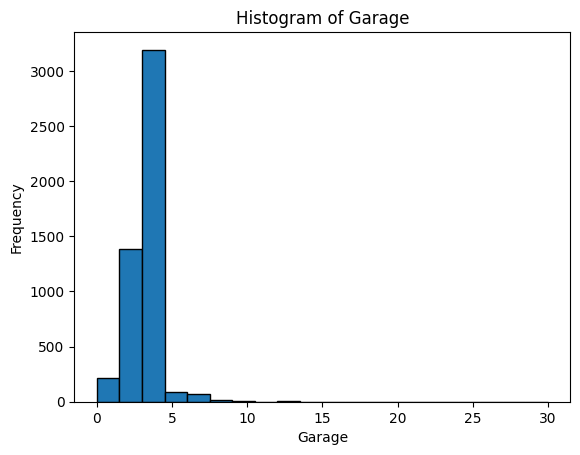

In [ ]:
# check 'garage' data distribution
# plot histogram
plt.hist(df_house['garage'].dropna(), bins=20, edgecolor='black')
plt.title('Histogram of Garage')
plt.xlabel('Garage')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# the distribution is skewed so the missing values will be replaced with the median value
df_house['garage'].fillna(df_house['garage'].median(), inplace=True)

In [ ]:
# 'fireplaces' should be integer type, check unique values before changing data type
df_house['fireplaces'].unique()

array(['6', '5', '4', '1', '2', '3', '7', '0', '9', ' ', '8'],
      dtype=object)

In [ ]:
# replace space with 0
df_house.loc[df_house["fireplaces"] == " ", "fireplaces"] = 0

In [ ]:
# change 'fireplaces' and 'bathrooms' to integer type
df_house['fireplaces']=df_house['fireplaces'].astype(int)
df_house['bathrooms'] = df_house['bathrooms'].astype(int)

In [ ]:
# check 'year_built' unique values
df_house['year_built'].unique()

array([1941, 1997, 1930, 1995, 1999, 2001, 2011, 2002, 2007, 1935, 2009,
       2015, 2008, 2010, 1983, 2005, 1936, 1998, 2004, 1985, 2018, 2019,
       2000,    0, 2012, 2016, 2003, 1954, 1994, 2014, 2017, 1967, 2013,
       1943, 1953, 2006, 1968, 1982, 1981, 1993, 1989, 1928, 1900, 1996,
       1977, 1984, 1992, 1922, 1952, 1991, 1959, 1970, 1911, 1979, 1986,
       1990, 1974, 1964, 1925, 1972, 1987, 1980, 1988, 1929, 1951, 1958,
       1973, 1961, 1946, 1963, 1969, 1976, 1947, 1971, 1940, 1948, 1937,
       1965, 1966, 1978, 1960, 1934, 1956, 1907, 1938, 1950, 1955, 1932,
       1939, 1957, 1893, 1962, 1975, 1924, 1901, 1949, 1902, 1942, 1945,
       1923, 1913, 1944, 1931, 1918, 1921, 1926, 1919, 1914, 1917, 1910,
       1905, 1927])

In [ ]:
# view records with year 0
df_house[df_house['year_built']==0]

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
35,21307177,2495000.0,85637,-110.740635,31.720431,131.00,1220.32,0,13,15,13000.0,0.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",4,"Carpet, Ceramic Tile, Mexican Tile",0
162,21207587,1210520.0,85658,-111.101588,32.468488,0.33,1412.75,0,4,5,3334.0,2.0,"Dishwasher, Refrigerator, Microwave, Oven",3,"Carpet, Natural Stone, Wood",550
946,21608590,695000.0,85645,-111.183593,31.702330,72.00,2480.58,0,4,4,2272.0,2.0,"Dishwasher, Refrigerator, Oven",2,Ceramic Tile,0
1438,21702126,877170.0,85755,-110.977158,32.459429,0.60,2005.57,0,3,4,3078.0,3.0,"Dishwasher, Garbage Disposal, Microwave, Oven",0,Other,167
1767,21719857,700000.0,85701,-110.963672,32.216996,0.13,7059.56,0,3,3,2500.0,3.0,"Dishwasher, Electric Range, Garbage Disposal, ...",0,Other: Recycled Porcelain,74


In [ ]:
# create house age feature
df_house['age'] = 2019-df_house['year_built']
# create price per square foot column
df_house['price/sqft']=round(df_house['sold_price']/df_house['sqrt_ft'],2)

In [ ]:
# replace values with median
df_house.loc[df_house["age"] == 2019, "age"] = df_house['age'].median()

In [ ]:
# drop columns that won't contribute to our usecase
df_house = df_house.drop(['MLS','zipcode', 'lot_acres', 'taxes', 'year_built','HOA','sold_price'], axis =1 )

In [ ]:
# Create Lists for numerical, categorical and all columns excluding columns related to location
num_cols = ['price/sqft', 'bathrooms', 'sqrt_ft', 'garage','fireplaces','age','bedrooms']
cat_cols = ['kitchen_features', 'floor_covering']

In [ ]:
# Basic statisitcs
df_house[num_cols].describe()

,price/sqft,bathrooms,sqrt_ft,garage,fireplaces,age,bedrooms
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,207.701314,3.742791,3658.534279,2.761314,1.874650,23.859131,3.876952
std,47.374231,0.871227,870.690844,0.796294,1.125202,15.213647,0.806746
min,87.440000,1.500000,1446.375000,0.500000,0.000000,0.000000,1.500000
25%,175.160000,3.000000,3051.000000,2.000000,1.000000,13.000000,3.000000
50%,202.100000,4.000000,3524.000000,3.000000,2.000000,20.000000,4.000000
75%,233.640000,4.000000,4120.750000,3.000000,3.000000,32.000000,4.000000
max,321.360000,5.500000,5725.375000,4.500000,6.000000,60.500000,5.500000


In [ ]:
# if any duplicates will be dropped
df_house=df_house.drop_duplicates()

In [ ]:
# rearrange the order of the columns
df_house = df_house[['price/sqft', 'sqrt_ft', 'bedrooms','bathrooms','longitude', 'latitude','garage',
        'fireplaces', 'floor_covering','kitchen_features', 'age' ]]

## Visualisations

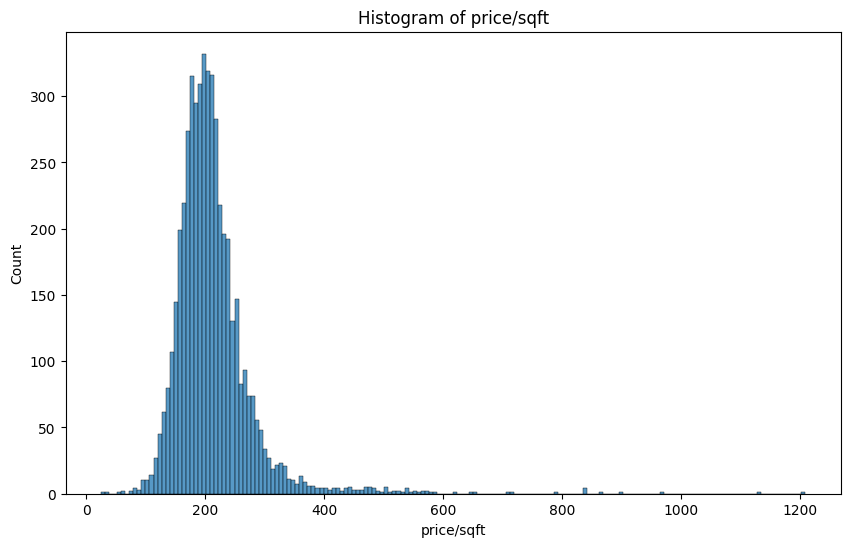

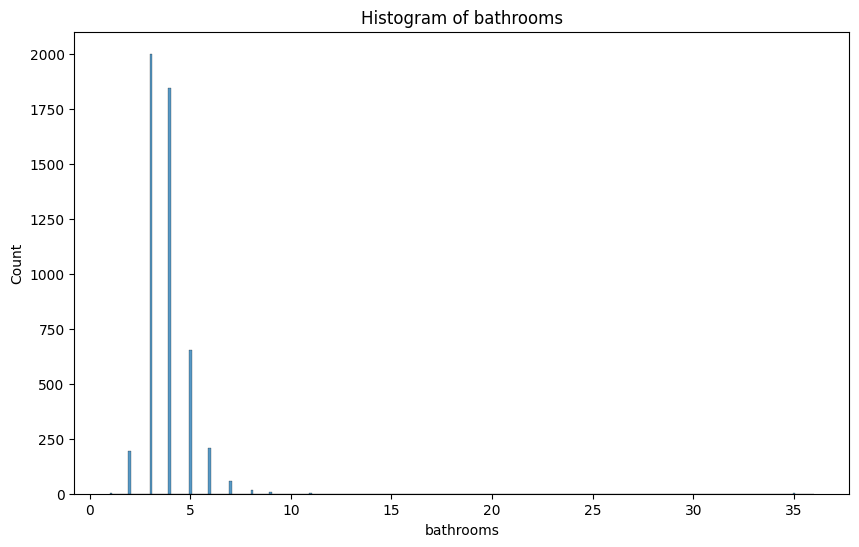

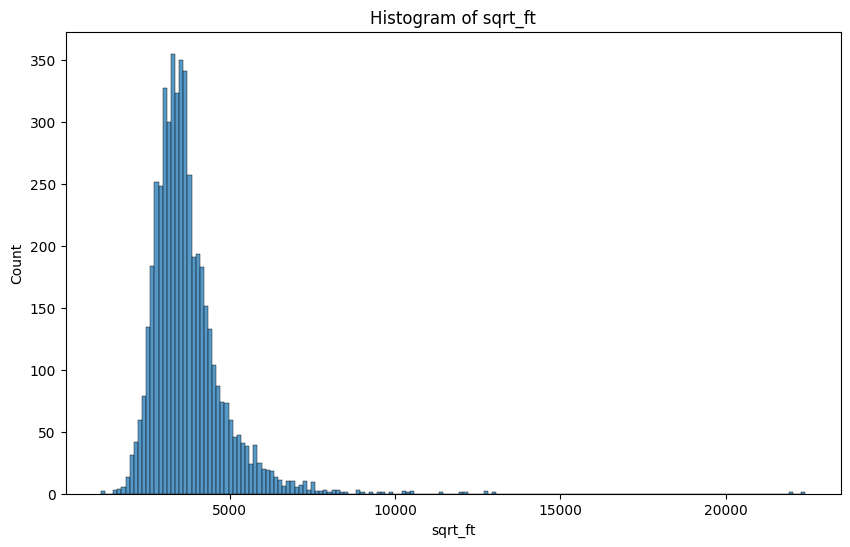

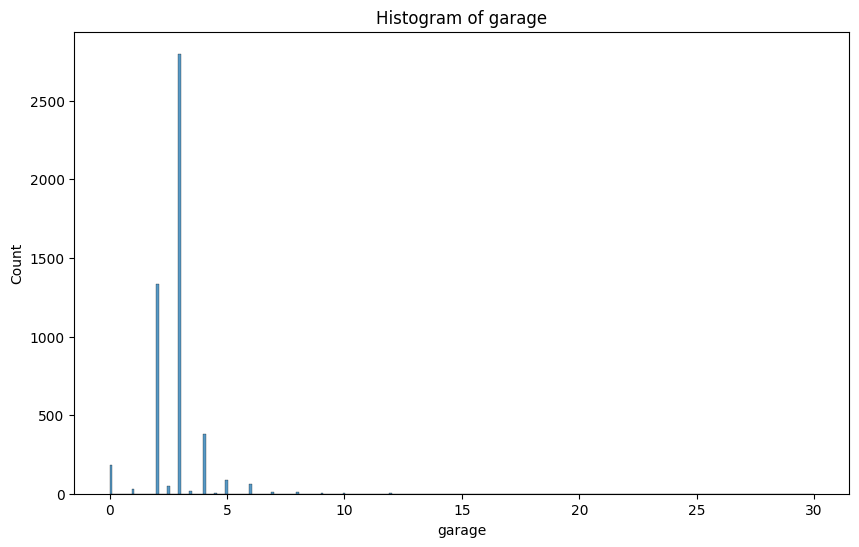

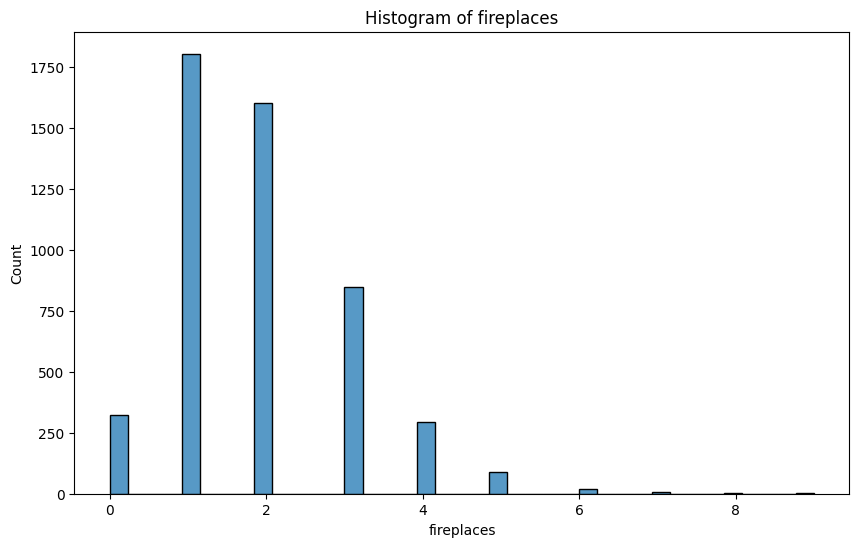

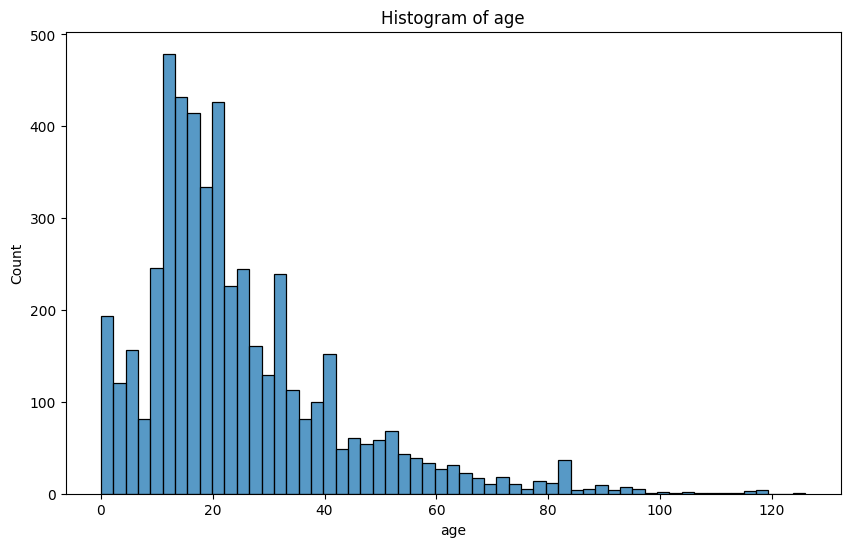

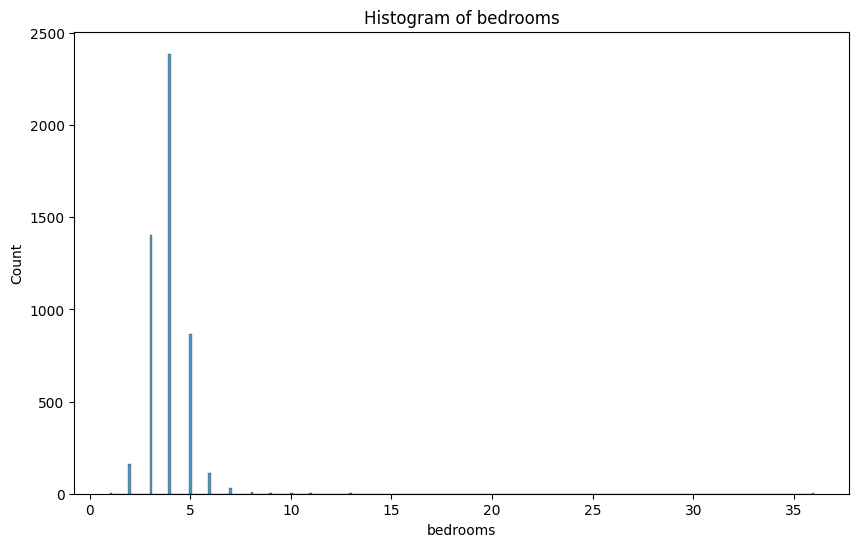

In [ ]:
# Histograms
for col in num_cols:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df_house, x=df_house[col])
  plt.title(f'Histogram of {col}')
  plt.show()

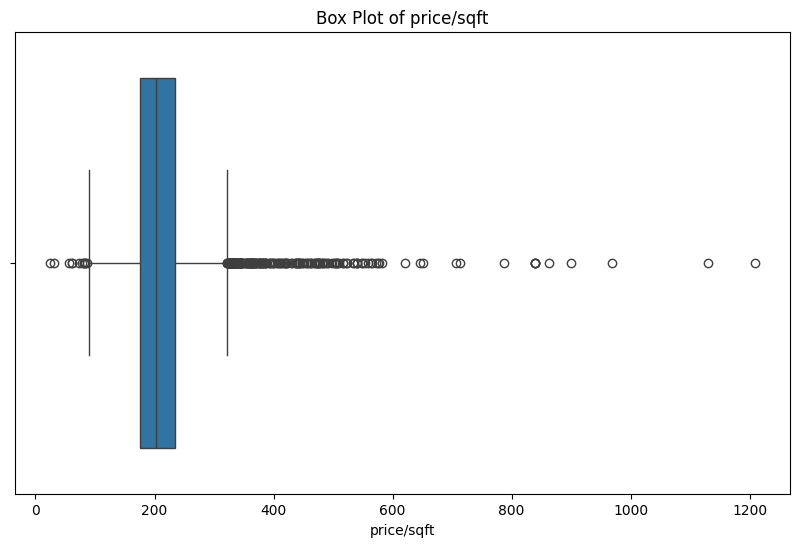

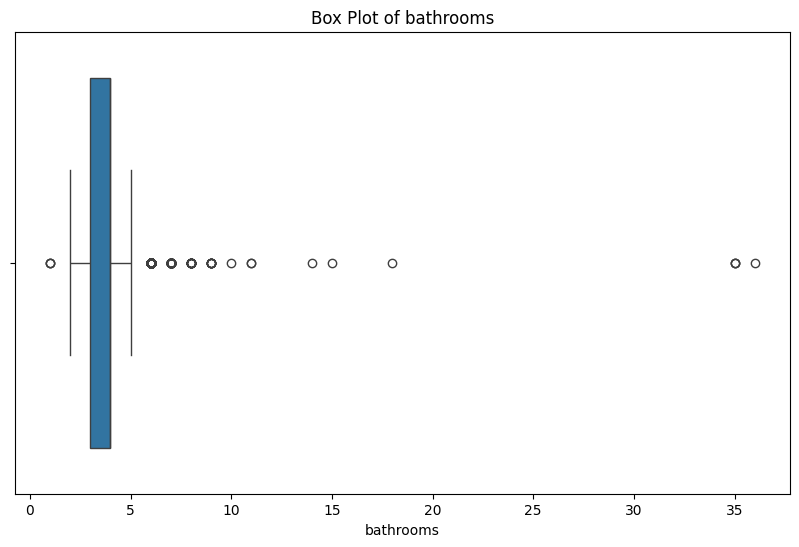

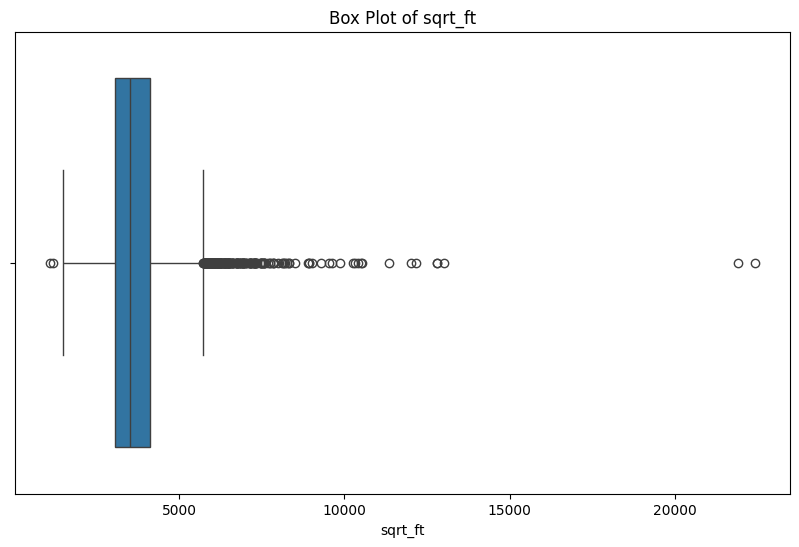

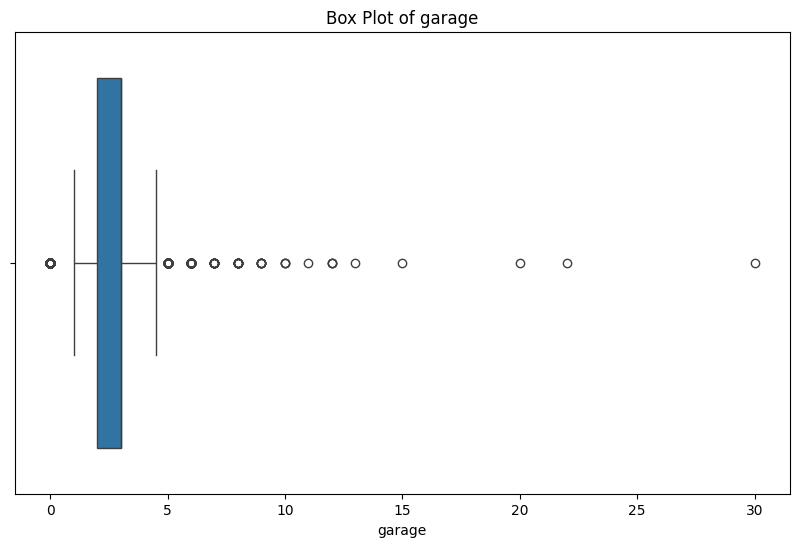

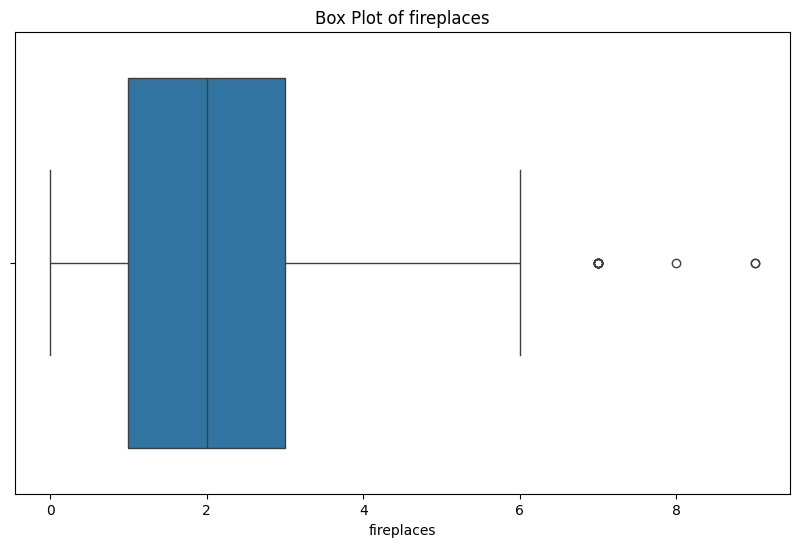

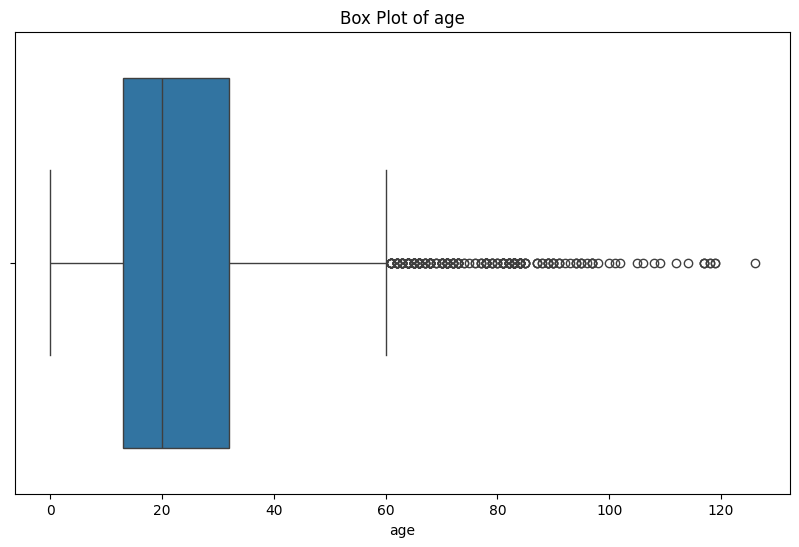

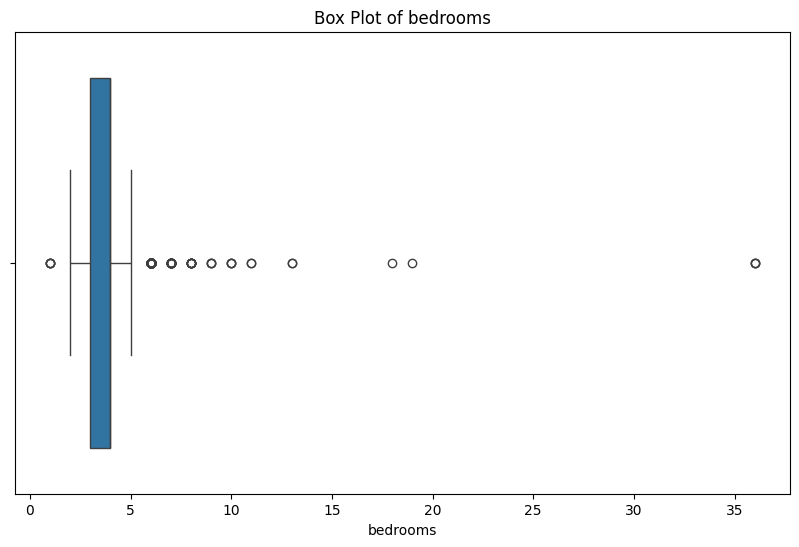

In [ ]:
# Boxplots
for col in num_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df_house[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

## Outliers

In [ ]:
# check outliers based on IQR method
for col in num_cols:
    q1 = df_house[col].quantile(0.25)
    q3 = df_house[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df_house[(df_house[col] < lower_bound) | (df_house[col] > upper_bound)]
outliers



,price/sqft,sqrt_ft,bedrooms,bathrooms,longitude,latitude,garage,fireplaces,floor_covering,kitchen_features,age
0,504.76,10500.0,13,10,-110.378200,31.356362,0.0,6,"Mexican Tile, Wood","Dishwasher, Freezer, Refrigerator, Oven",78
3,498.95,9019.0,7,5,-111.035925,31.645878,4.0,4,"Ceramic Tile, Laminate, Wood","Dishwasher, Double Sink, Pantry: Butler, Refri...",89
6,199.58,12025.0,9,8,-110.883315,32.261069,4.0,6,"Carpet, Natural Stone, Wood, Other","Dishwasher, Garbage Disposal, Oven",18
7,280.24,8921.0,6,8,-110.861002,32.331603,4.0,5,"Carpet, Natural Stone, Wood","Compactor, Dishwasher, Freezer, Garbage Dispos...",8
12,325.38,6454.0,6,7,-110.736202,31.721347,3.0,4,"Mexican Tile, Natural Stone, Wood","Dishwasher, Garbage Disposal, Refrigerator, Mi...",24
...,...,...,...,...,...,...,...,...,...,...,...
4602,167.28,3258.0,6,4,-110.739628,32.266742,3.0,3,"Carpet, Ceramic Tile, Mexican Tile","Dishwasher, Double Sink, Garbage Disposal, Gas...",27
4745,116.42,4810.0,6,5,-110.780413,32.248935,3.0,2,"Carpet, Ceramic Tile, Wood","Compactor, Dishwasher, Garbage Disposal, Refri...",37
4809,135.88,4000.0,10,5,-110.964480,32.281713,0.0,5,Ceramic Tile,"Dishwasher, Electric Range, Refrigerator, Appl...",39
4810,183.46,3047.0,6,4,-110.925026,32.233120,2.0,1,"Ceramic Tile, Mexican Tile, Wood","Dishwasher, Double Sink, Garbage Disposal, Gas...",26


In [ ]:
# Flooring and Capping  Outliers
for col in num_cols:
  whisker_width = 1.5
  Q1 = df_house[col].quantile(0.25)
  Q3 = df_house[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - (whisker_width * IQR)
  upper_whisker = Q3 + (whisker_width * IQR)
  df_house[col] = np.where(
            df_house[col] > upper_whisker, upper_whisker,
            np.where(df_house[col] < lower_whisker, lower_whisker, df_house[col])
        )

<Axes: >

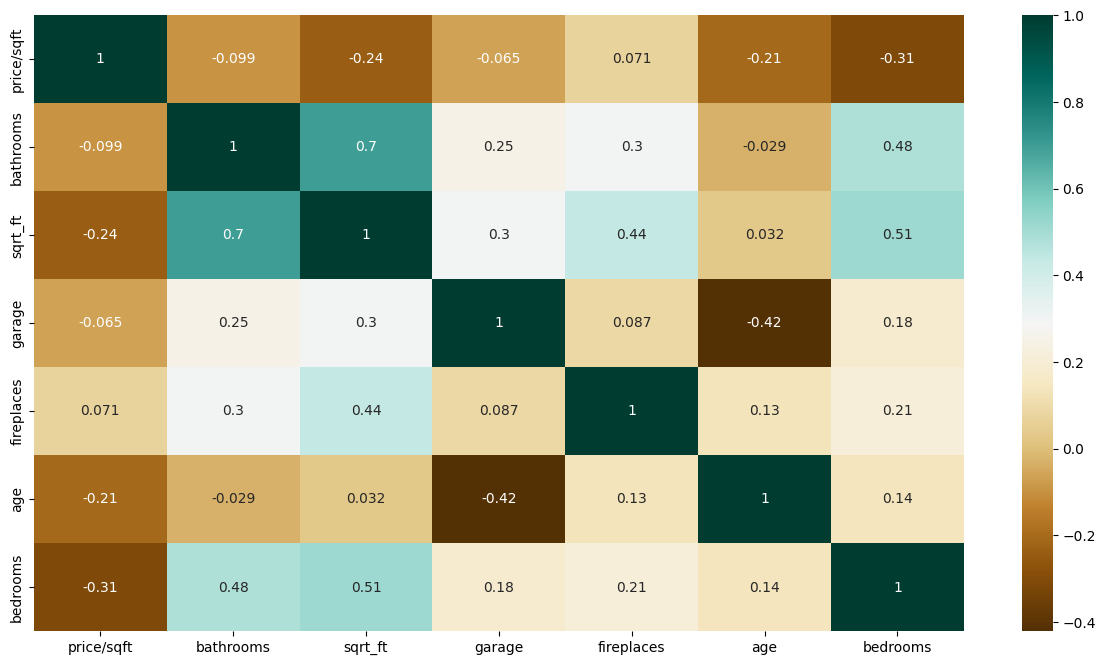

In [ ]:
# Corelation Matrix
c = df_house[num_cols].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(c,cmap='BrBG', annot=True)

## Price prediction model

In [ ]:
class MultipleLinearReg():
    def fit(self, X, y):
        # Add an intercept term (a column of ones) to the feature matrix X
        X = np.column_stack((np.ones(X.shape[0]), X))  # Add intercept term
        self.X = X
        self.y = y

        # Compute the coefficients using the Normal Equation
        # w = (X^T * X)^(-1) * X^T * y
        X_transpose = X.T
        self.coefficients = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

    def predict(self, X):
        # Add an intercept term (a column of ones) to the feature matrix X
        X = np.column_stack((np.ones(X.shape[0]), X))  # Add intercept term
        return X @ self.coefficients



In [ ]:
df_house_num = df_house[num_cols]
df_house_num

,price/sqft,bathrooms,sqrt_ft,garage,fireplaces,age,bedrooms
0,321.36,5.5,5725.375000,0.5,6.0,60.5,5.5
1,321.36,2.0,5725.375000,0.5,5.0,22.0,2.0
2,321.36,3.0,3716.366828,3.0,5.0,22.0,2.0
3,321.36,5.0,5725.375000,4.0,4.0,60.5,5.5
4,321.36,5.5,5725.375000,3.0,5.0,24.0,4.0
...,...,...,...,...,...,...,...
4995,137.46,3.0,3601.000000,3.0,1.0,14.0,5.0
4996,237.27,3.0,2318.000000,3.0,1.0,29.0,4.0
4997,268.06,2.0,1772.000000,0.5,0.0,50.0,3.0
4998,147.69,4.0,3724.000000,3.0,1.0,10.0,4.0


In [ ]:
# Normalise function
def normalise(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [ ]:
# Define features and target
features = ['sqrt_ft', 'bedrooms', 'bathrooms', 'garage']
target = 'price/sqft'

# Split ratio
train_ratio = 0.9
y = df_house_num[target].to_numpy()



In [ ]:
# model
X = df_house_num[features].to_numpy()
print(X)

[[5.72537500e+03 5.50000000e+00 5.50000000e+00 5.00000000e-01]
 [5.72537500e+03 2.00000000e+00 2.00000000e+00 5.00000000e-01]
 [3.71636683e+03 2.00000000e+00 3.00000000e+00 3.00000000e+00]
 ...
 [1.77200000e+03 3.00000000e+00 2.00000000e+00 5.00000000e-01]
 [3.72400000e+03 4.00000000e+00 4.00000000e+00 3.00000000e+00]
 [4.31700000e+03 4.00000000e+00 4.00000000e+00 3.00000000e+00]]


In [ ]:
# normalise data
X = normalise(X)
X

array([[1.        , 1.        , 1.        , 0.        ],
       [1.        , 0.125     , 0.125     , 0.        ],
       [0.53049587, 0.125     , 0.375     , 0.625     ],
       ...,
       [0.07609839, 0.375     , 0.125     , 0.        ],
       [0.53227974, 0.625     , 0.625     , 0.625     ],
       [0.67086352, 0.625     , 0.625     , 0.625     ]])

In [ ]:
# Shuffle the data
N = X.shape[0]
indices = np.random.permutation(N)

# Split the data
split_index = int(train_ratio * N)
train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# Fit the model
model = MultipleLinearReg()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [141]:
# live example
#area, bedrooms,bathrooms,garages
X=np.array([1226,2,2,1])
reshaped_arr = X.reshape(1, 4)
normalized_arr = reshaped_arr / np.max(reshaped_arr)
ans=model.predict(normalized_arr)
ans*1226

array([239360.67491379])

In [142]:
def R2(Y, Y_hat):
    ss_res = np.sum((Y - Y_hat) ** 2)  # Sum of squared residuals
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)


In [143]:
R2(y_test,y_pred)

0.10377431344341148

In [144]:
# Evaluate the model
mse = np.mean((y_test - y_pred.flatten())**2)
mse

1970.1969796175129

In [145]:
bedroom_list = list(set(df_house['bedrooms']))
bathrooms_list = list(set(df_house['bathrooms']))
garages_list = list(set(df_house['garage']))

In [146]:
import itertools

def find_max_price(model, sqrt_ft_value, bathrooms_list, garage_list, bedrooms_list):
    max_price = -np.inf
    best_combination = None


    for combination in itertools.product(bathrooms_list, garage_list, bedrooms_list):
        bathrooms, garage, bedrooms = combination

        X = np.array([[sqrt_ft_value, bedrooms, bathrooms, garage]])  # Ensure correct feature order

        predicted_price = model.predict(X)

        if predicted_price.size == 1:
            predicted_price = predicted_price.item()
        else:
            raise ValueError("Prediction result is not a single value")

        if predicted_price > max_price:
            max_price = predicted_price
            best_combination = combination

    return best_combination, max_price

In [147]:
best_combination, max_price = find_max_price(model, 1000, bathrooms_list, garages_list, bedroom_list)
print(f"Best combination: {best_combination}, Max price: {max_price}")

Best combination: (5.5, 0.5, 1.5), Max price: -56848.87735711408
